# Import Packages

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import numpy as np
import random

In [12]:
path='/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/source_data/'
ori=os.path.join(path, 'crop500')
mask=os.path.join(path, 'Mask512')
bump=os.path.join(path, 'Bumps512P')

In [15]:
os.path.join(bump, fold, file)

'/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/source_data/Bumps512P/21/Johann_Urb_Ox290.png'

# Split train/ val (100 rand imgs)

(randomly selected in original folder)

In [20]:
os.path.join(ori, file_name)

'/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/source_data/crop500/Scarlett_Pomers_Ox865.png'

In [23]:
list_img=[]
for fold in tqdm(os.listdir(ori)):
    for file_name in os.listdir(os.path.join(ori, fold)):
        if (os.path.isfile(os.path.join(ori, fold, file_name)),
            os.path.isfile(os.path.join(bump, fold, file_name)),
            os.path.isfile(os.path.join(mask, fold, file_name)))== (True, True, True):
            list_img.append('{}/{}'.format(fold, file_name))
print(len(list_img))
val = random.sample(list_img, 100)
train = [x for x in list_img if x not in val]
print((len(list_img), len(train), len(val)))


4331
(4331, 4231, 100)


In [24]:
with open(os.path.join(path, 'train.txt'), 'w') as f:
    for item in train:
        f.write("%s\n" % item)
with open(os.path.join(path, 'val.txt'), 'w') as f:
    for item in val:
        f.write("%s\n" % item)

In [25]:
fold, file = val[0].split('/')

/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/source_data/crop500/44/Paul_Lynde_Ox145.png


Text(0.5, 1.0, 'RBG img, mask, bump')

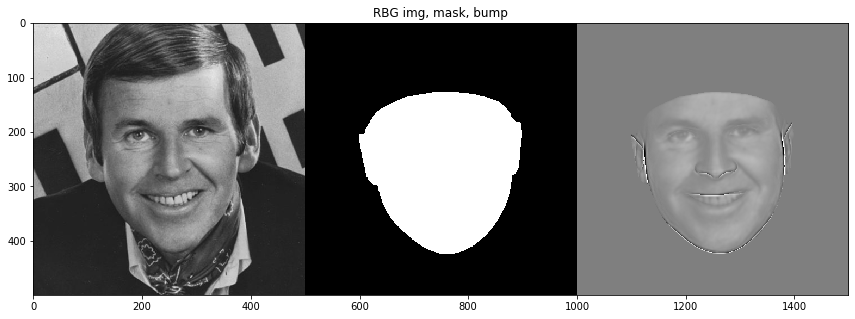

In [27]:
img=plt.imread(os.path.join(ori, fold, file))
mask_im=cv2.imread(os.path.join(mask, fold, file))[6:-6, 6:-6, :]
bump_im=cv2.imread(os.path.join(bump, fold, file))[6:-6, 6:-6, :]

print(os.path.join(ori, fold, file))
plt.figure(figsize=(15, 5))
plt.imshow(np.concatenate([(img * 255).astype(np.uint8), mask_im, bump_im], axis=1))
plt.title('RBG img, mask, bump')

/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/source_data/crop500/44/Paul_Lynde_Ox145.png


Text(0.5, 1.0, 'RBG img, mask, bump')

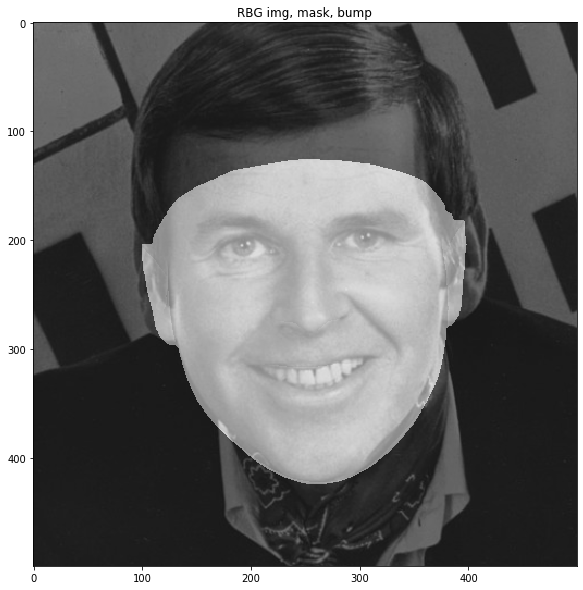

In [28]:
img=plt.imread(os.path.join(ori, fold, file))
mask_im=cv2.imread(os.path.join(mask, fold, file))[6:-6, 6:-6]
bump_im=cv2.imread(os.path.join(bump, fold, file))[6:-6, 6:-6, :]

print(os.path.join(ori, fold, file))
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.imshow(mask_im, alpha=0.5)
plt.imshow(bump_im, alpha=0.1)
plt.title('RBG img, mask, bump')

# Create Joint (mask + bump)

In [29]:
path='/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/source_data/'
with open(os.path.join(path, 'train.txt')) as f:
    train = f.read().splitlines()
with open(os.path.join(path, 'val.txt')) as f:
    val = f.read().splitlines()

/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/source_data/crop500/44/Paul_Lynde_Ox145.png


Text(0.5, 1.0, 'mask, bump')

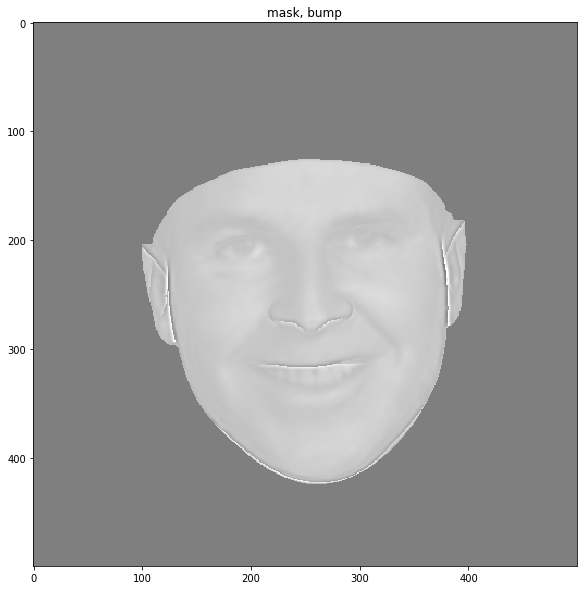

In [30]:
img=plt.imread(os.path.join(ori, fold, file))
mask_im=cv2.imread(os.path.join(mask, fold, file))[6:-6, 6:-6]
bump_im=cv2.imread(os.path.join(bump, fold, file))[6:-6, 6:-6, :]

print(os.path.join(ori, fold, file))
plt.figure(figsize=(10, 10))
#plt.imshow(img)
plt.imshow(mask_im, alpha=0.5)
plt.imshow(bump_im, alpha=0.5)
plt.title('mask, bump')

In [31]:
indices = np.where(mask_im==0)
bump_im[indices]=0
# plt.imshow(bump_im)

# Bump + Mask

In [40]:
dest_path = '/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/bump_mask/train'

for x in tqdm(train):
    # read file
    # print(file)
    if (os.path.isfile(os.path.join(ori, x)), os.path.isfile(os.path.join(bump, x)), os.path.isfile(os.path.join(mask, x)))== (True, True, True):
        ori_im = cv2.imread(os.path.join(ori, x))
        bump_im = cv2.imread(os.path.join(bump, x))
        mask_im = cv2.imread(os.path.join(mask, x))
        fold, file= x.split('/')
        filename = fold+ '_' + file
        # crop image
        indices = np.where(mask_im==0)
        bump_im[indices]=0
        bump_im=bump_im[6:-6, 6:-6]
        #plt.imshow(np.concatenate([ori_im, bump_im], axis=1))
        bump_im=np.concatenate([ori_im, bump_im], axis=1)
        cv2.imwrite(os.path.join(dest_path, filename), bump_im)
    else:
        print(x)

In [41]:
dest_path = '/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/bump_mask/val'

for x in tqdm(val):
    # read file
    # print(file)
    if (os.path.isfile(os.path.join(ori, x)), os.path.isfile(os.path.join(bump, x)), os.path.isfile(os.path.join(mask, x)))== (True, True, True):
        ori_im = cv2.imread(os.path.join(ori, x))
        bump_im = cv2.imread(os.path.join(bump, x))
        mask_im = cv2.imread(os.path.join(mask, x))
        fold, file= x.split('/')
        filename = fold+ '_' + file
        # crop image
        indices = np.where(mask_im==0)
        bump_im[indices]=0
        bump_im=bump_im[6:-6, 6:-6]
        #plt.imshow(np.concatenate([ori_im, bump_im], axis=1))
        bump_im=np.concatenate([ori_im, bump_im], axis=1)
        cv2.imwrite(os.path.join(dest_path, filename), bump_im)
    else:
        print(x)

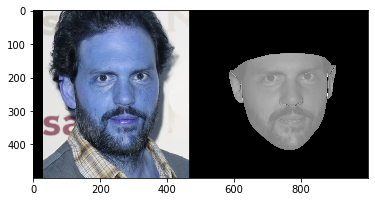

In [42]:
plt.imshow(cv2.imread(os.path.join(dest_path, filename)))

# Mask Only

In [50]:
dest_path = '/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/mask_only/train'

for x in tqdm(train):
    # read file
    # print(file)
    if (os.path.isfile(os.path.join(ori, x)), os.path.isfile(os.path.join(bump, x)), os.path.isfile(os.path.join(mask, x)))== (True, True, True):
        ori_im = cv2.imread(os.path.join(ori, x))
        #bump_im = cv2.imread(os.path.join(bump, x))
        mask_im = cv2.imread(os.path.join(mask, x))
        fold, file= x.split('/')
        filename = fold+ '_' + file
        # crop image
        # indices = np.where(mask_im==0)
        #bump_im[indices]=0
        mask_im=mask_im[6:-6, 6:-6]
        #plt.imshow(np.concatenate([ori_im, bump_im], axis=1))
        mask_im=np.concatenate([ori_im, mask_im], axis=1)
        cv2.imwrite(os.path.join(dest_path, filename), mask_im)
    else:
        print(x)

dest_path = '/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/mask_only/val'

for x in tqdm(val):
    # read file
    # print(file)
    if (os.path.isfile(os.path.join(ori, x)), os.path.isfile(os.path.join(bump, x)), os.path.isfile(os.path.join(mask, x)))== (True, True, True):
        ori_im = cv2.imread(os.path.join(ori, x))
        #bump_im = cv2.imread(os.path.join(bump, x))
        mask_im = cv2.imread(os.path.join(mask, x))
        fold, file= x.split('/')
        filename = fold+ '_' + file
        # crop image
        # indices = np.where(mask_im==0)
        #bump_im[indices]=0
        mask_im=mask_im[6:-6, 6:-6]
        #plt.imshow(np.concatenate([ori_im, bump_im], axis=1))
        mask_im=np.concatenate([ori_im, mask_im], axis=1)
        cv2.imwrite(os.path.join(dest_path, filename), mask_im)
    else:
        print(x)

In [51]:
os.path.join(dest_path, filename)

'/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/mask_only/val/28_Silas_Weir_Mitchell_Ox15.png'

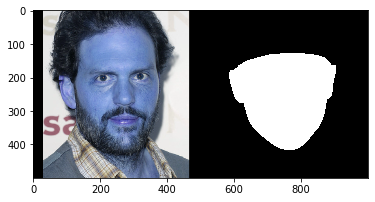

In [52]:
plt.imshow(cv2.imread(os.path.join(dest_path, filename)))

In [48]:
cv2.imread(os.path.join(dest_path, filename))

In [53]:
dest_path = '/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/bump_only/train'

for x in tqdm(train):
    # read file
    # print(file)
    if (os.path.isfile(os.path.join(ori, x)), os.path.isfile(os.path.join(bump, x)), os.path.isfile(os.path.join(mask, x)))== (True, True, True):
        ori_im = cv2.imread(os.path.join(ori, x))
        bump_im = cv2.imread(os.path.join(bump, x))
        #mask_im = cv2.imread(os.path.join(mask, x))
        fold, file= x.split('/')
        filename = fold+ '_' + file
        # crop image
        # indices = np.where(mask_im==0)
        #bump_im[indices]=0
        bump_im=bump_im[6:-6, 6:-6]
        #plt.imshow(np.concatenate([ori_im, bump_im], axis=1))
        bump_im=np.concatenate([ori_im, bump_im], axis=1)
        cv2.imwrite(os.path.join(dest_path, filename), mask_im)
    else:
        print(x)

dest_path = '/home/thaontp79/Documents/project/pytorch-CycleGAN-and-pix2pix/datasets/bump_only/val'

for x in tqdm(val):
    # read file
    # print(file)
    if (os.path.isfile(os.path.join(ori, x)), os.path.isfile(os.path.join(bump, x)), os.path.isfile(os.path.join(mask, x)))== (True, True, True):
        ori_im = cv2.imread(os.path.join(ori, x))
        bump_im = cv2.imread(os.path.join(bump, x))
        #mask_im = cv2.imread(os.path.join(mask, x))
        fold, file= x.split('/')
        filename = fold+ '_' + file
        # crop image
        # indices = np.where(mask_im==0)
        #bump_im[indices]=0
        bump_im=bump_im[6:-6, 6:-6]
        #plt.imshow(np.concatenate([ori_im, bump_im], axis=1))
        bump_im=np.concatenate([ori_im, bump_im], axis=1)
        cv2.imwrite(os.path.join(dest_path, filename), mask_im)
    else:
        print(x)